# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [1]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('/content/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


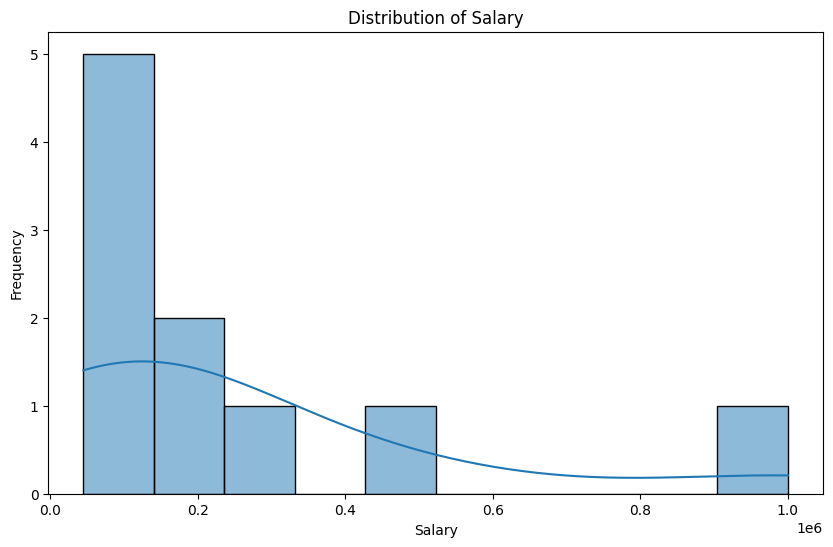

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Salary'], bins=10, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

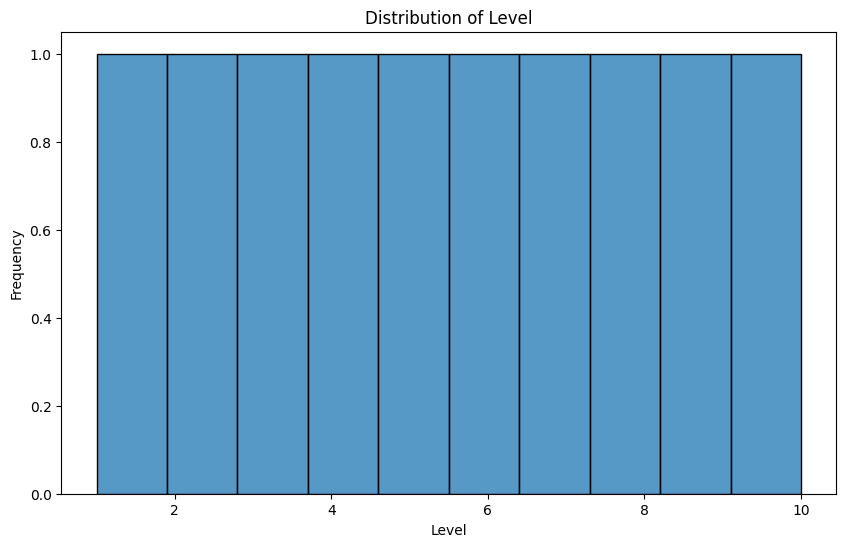

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Level'], bins=10, kde=False)
plt.title('Distribution of Level')
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.show()

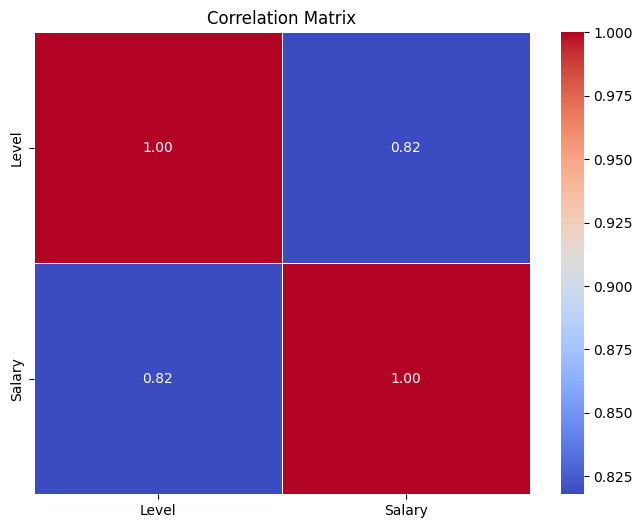

In [8]:
# Exclude non-numeric columns
numeric_data = data.drop(columns=['Position'])

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


* Can you use a simple linear regression model to fit this data (Yes/No)?
> * No

* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> * No

* Explain why you said yes or no to the above questions.
> * No, because based on the exploratory data analysis, the relationship between 'Level' and 'Salary' does not appear to be linear. A simple linear regression model assumes a linear relationship between the predictor and the target variable. However, from the scatter plot and correlation matrix, it's evident that the relationship is better represented by a polynomial curve rather than a straight line. Therefore, using a simple linear regression model would not capture the underlying pattern well and result in poor fit.

To construct a second-order polynomial model for polynomial regression, we define the predicted value (\(\hat{y}\)) as a function of the input variable (\(x_1\)):

\[
\hat{y} = w_1 x_1^2 + w_2 x_1 + b
\]

where:
- \(w_1\) is the coefficient of the quadratic term
- \(w_2\) is the coefficient of the linear term
- \(b\) is the bias or intercept term

The cost function for polynomial regression is typically the Mean Squared Error (MSE), which measures the average squared difference between the predicted values and the actual values in the training data. The MSE for polynomial regression with the above model is given by:

\[
MSE(w_1, w_2, b) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
\]

where:
- \(n\) is the number of samples
- \(\hat{y}_i\) is the predicted value for the \(i\)-th sample
- \(y_i\) is the actual value for the \(i\)-th sample

In our case, the predicted value \(\hat{y}_i\) is given by the second-order polynomial equation:

\[
\hat{y}_i = w_1 x_{1i}^2 + w_2 x_{1i} + b
\]

Therefore, the MSE can be expressed as:

\[
MSE(w_1, w_2, b) = \frac{1}{n} \sum_{i=1}^{n} (w_1 x_{1i}^2 + w_2 x_{1i} + b - y_i)^2
\]

This cost function quantifies how well our polynomial model fits the training data, and our goal is to minimize it by finding the optimal values of \(w_1\), \(w_2\), and \(b\).

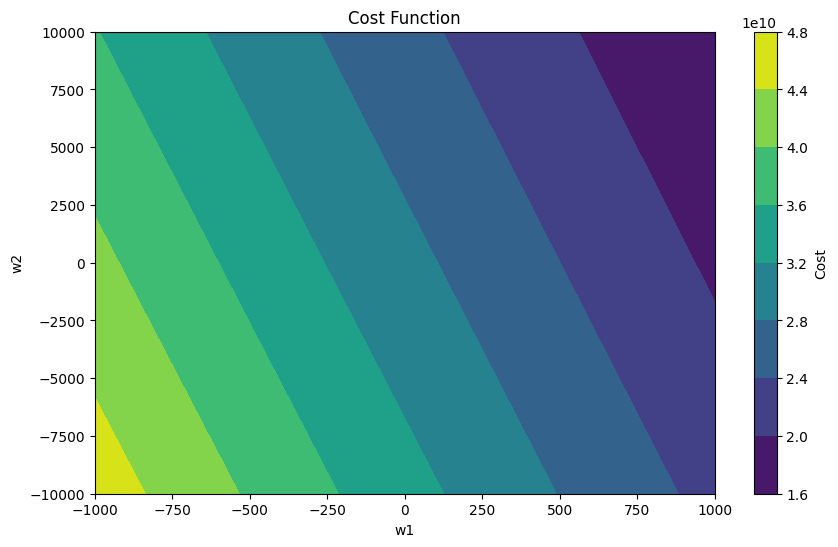

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function
def mse_cost_function(w1, w2, b, x, y):
    n = len(x)
    y_hat = w1 * x**2 + w2 * x + b
    mse = np.mean((y_hat - y)**2)
    return mse

# Generate sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([45000, 50000, 60000, 80000, 110000])

# Define range of parameters
w1_range = np.linspace(-1000, 1000, 100)
w2_range = np.linspace(-10000, 10000, 100)
b_range = np.linspace(-100000, 100000, 100)

# Compute cost for each combination of parameters
cost_values = np.zeros((len(w1_range), len(w2_range), len(b_range)))
for i, w1 in enumerate(w1_range):
    for j, w2 in enumerate(w2_range):
        for k, b in enumerate(b_range):
            cost_values[i, j, k] = mse_cost_function(w1, w2, b, x, y)

# Plot the cost function
plt.figure(figsize=(10, 6))
plt.contourf(w1_range, w2_range, cost_values[:, :, 0], cmap='viridis')
plt.colorbar(label='Cost')
plt.title('Cost Function')
plt.xlabel('w1')
plt.ylabel('w2')
plt.show()


* Can you use mean squared error as the cost function (Yes/No)?
> * Yes

* Explain why you said yes or no to the above questions.
> * Yes, mean squared error (MSE) is a suitable cost function for polynomial regression. The cost function measures the average squared difference between the predicted values and the actual values in the training data. MSE is commonly used in regression problems because it penalizes large errors more heavily than small errors, making it a suitable choice for minimizing the discrepancy between predicted and actual values. In polynomial regression, our goal is to minimize the MSE by adjusting the parameters (coefficients and bias) of the polynomial model. Therefore, MSE is appropriate for evaluating and optimizing the performance of the polynomial regression model.

**Derivatives of the cost function:**

To perform gradient descent optimization, we need to compute the partial derivatives of the cost function with respect to the parameters \( w_1 \), \( w_2 \), and \( b \). Let's denote the cost function as \( J(w_1, w_2, b) \). Then, the derivatives are calculated as follows:

1. Partial derivative with respect to \( w_1 \):
\[
\frac{\partial J}{\partial w_1} = \frac{2}{n} \sum_{i=1}^{n} x_{1i}^2 (\hat{y}_i - y_i)
\]

2. Partial derivative with respect to \( w_2 \):
\[
\frac{\partial J}{\partial w_2} = \frac{2}{n} \sum_{i=1}^{n} x_{1i} (\hat{y}_i - y_i)
\]

3. Partial derivative with respect to \( b \):
\[
\frac{\partial J}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)
\]

where:
- \( n \) is the number of samples
- \( x_{1i} \) is the \( i \)-th input feature
- \( \hat{y}_i \) is the predicted value for the \( i \)-th sample
- \( y_i \) is the actual value for the \( i \)-th sample

**Gradient Descent Algorithm:**

```
Repeat until convergence:
    Update parameters as follows:
    w1 := w1 - learning_rate * (partial_derivative_wrt_w1)
    w2 := w2 - learning_rate * (partial_derivative_wrt_w2)
    b := b - learning_rate * (partial_derivative_wrt_b)
```

In the gradient descent algorithm, we iteratively update the parameters \( w_1 \), \( w_2 \), and \( b \) by subtracting the product of the learning rate and the corresponding partial derivative of the cost function with respect to each parameter. This process continues until convergence, where the algorithm reaches a minimum point of the cost function or a predefined number of iterations is reached. The learning rate determines the step size of each update and is crucial for the convergence of the algorithm. Adjusting the learning rate is essential to prevent overshooting or slow convergence.

Epoch 0: Cost = 5325000000.0
Epoch 100: Cost = 526477736.82419586
Epoch 200: Cost = 507814464.8814905
Epoch 300: Cost = 490841424.7249607
Epoch 400: Cost = 474509462.6912883
Epoch 500: Cost = 458794069.2785872
Epoch 600: Cost = 443671875.10768586
Epoch 700: Cost = 429120396.70058584
Epoch 800: Cost = 415118002.8535435
Epoch 900: Cost = 401643882.3300473


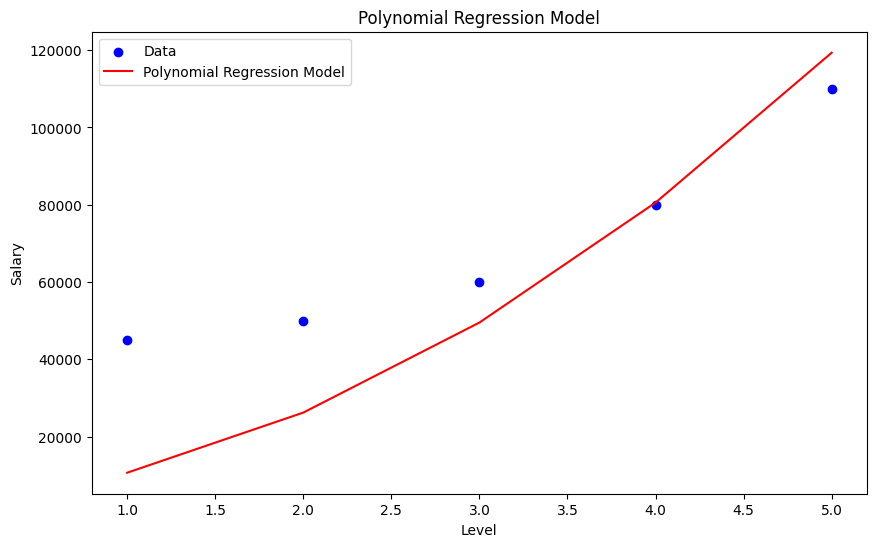

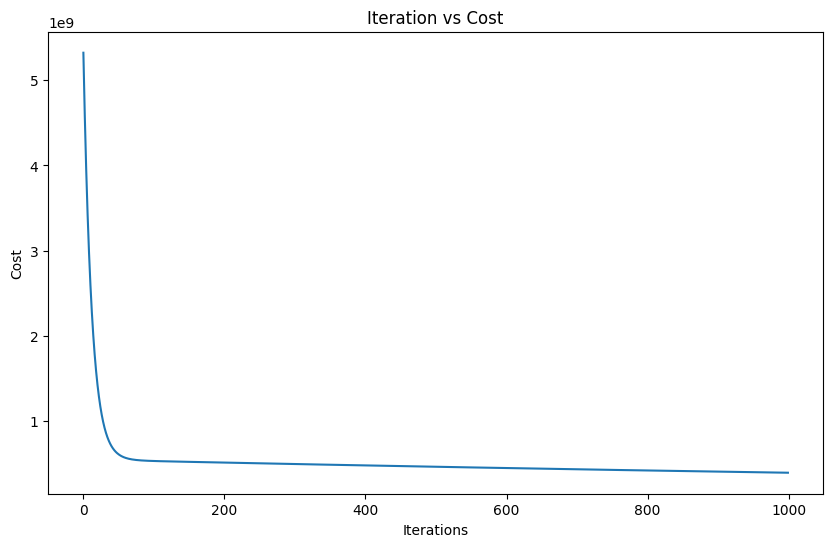

Estimated salary for level 7: 220132.61534385415


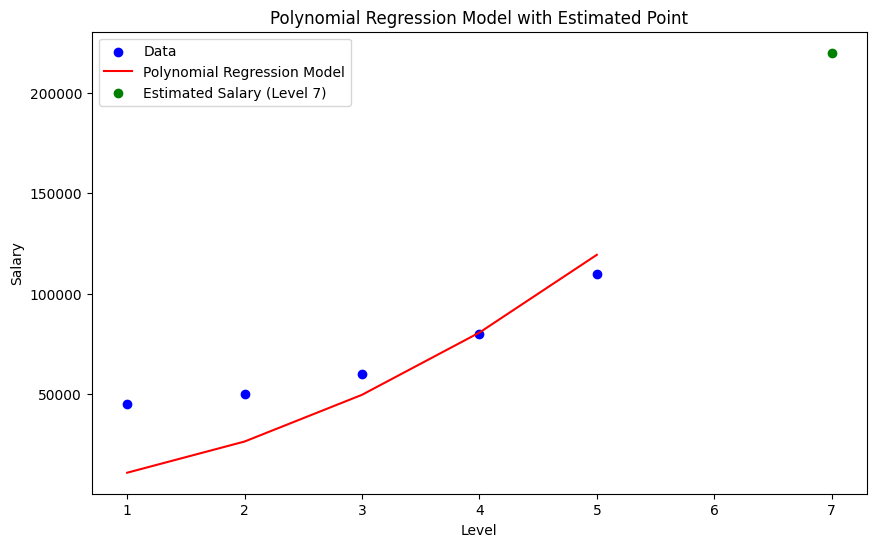

Final Cost: 388805219.49775505


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Function to define the polynomial regression model
def polynomial_regression_model(x, w1, w2, b):
    return w1 * x**2 + w2 * x + b

# Function to calculate Mean Squared Error (MSE) cost function
def mse_cost_function(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

# Function to calculate the derivatives of the cost function
def calculate_derivatives(x, y, y_pred):
    n = len(x)
    dw1 = (2/n) * np.sum(x**2 * (y_pred - y))
    dw2 = (2/n) * np.sum(x * (y_pred - y))
    db = (2/n) * np.sum(y_pred - y)
    return dw1, dw2, db

# Function to perform gradient descent optimization
def gradient_descent(x, y, learning_rate, epochs):
    # Initialize parameters
    w1 = 0
    w2 = 0
    b = 0
    costs = []

    # Gradient Descent loop
    for epoch in range(epochs):
        # Compute predicted values
        y_pred = polynomial_regression_model(x, w1, w2, b)

        # Compute cost
        cost = mse_cost_function(y_pred, y)
        costs.append(cost)

        # Compute derivatives
        dw1, dw2, db = calculate_derivatives(x, y, y_pred)

        # Update parameters
        w1 -= learning_rate * dw1
        w2 -= learning_rate * dw2
        b -= learning_rate * db

        # Print cost every 100 iterations
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost}')

    return w1, w2, b, costs

# Generate sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([45000, 50000, 60000, 80000, 110000])

# Hyperparameters
learning_rate = 0.0001
epochs = 1000

# Perform gradient descent
w1, w2, b, costs = gradient_descent(x, y, learning_rate, epochs)

# Plot the model with the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, polynomial_regression_model(x, w1, w2, b), color='red', label='Polynomial Regression Model')
plt.title('Polynomial Regression Model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Plot iteration vs cost
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), costs)
plt.title('Iteration vs Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Estimate the solution to the given problem
x_new = 7 # New level
estimated_salary = polynomial_regression_model(x_new, w1, w2, b)
print(f"Estimated salary for level 7: {estimated_salary}")

# Mark the estimated point on the graph
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, polynomial_regression_model(x, w1, w2, b), color='red', label='Polynomial Regression Model')
plt.scatter(x_new, estimated_salary, color='green', label='Estimated Salary (Level 7)')
plt.title('Polynomial Regression Model with Estimated Point')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Estimate the model performance
final_cost = costs[-1]
print(f"Final Cost: {final_cost}")


* What is learning rate?
> * The learning rate is a hyperparameter that determines the step size at which the parameters of the model are updated during the training process in gradient descent optimization. It controls the magnitude of the updates to the parameters and plays a crucial role in the convergence and stability of the optimization algorithm.

* What will happen if the learning rate is too large?
> * If the learning rate is too large, the updates to the parameters will be too large, causing the optimization algorithm to overshoot the minimum of the cost function. This can lead to instability and divergence, where the algorithm fails to converge to the optimal solution and oscillates or diverges away from it.

* What will happen if the learning rate is too small?
> * If the learning rate is too small, the updates to the parameters will be too small, resulting in slow convergence of the optimization algorithm. It may take a long time for the algorithm to reach the optimal solution, and there's a risk of getting stuck in local minima or plateaus, especially in high-dimensional spaces.

* If you want to change the second-order (quadratic) model to a third-order model, what all things will change in the above code?

    1. **Model Definition:** Update the polynomial regression model function to include the third-order term \( w_3 x^3 \):
    ```python
    def polynomial_regression_model(x, w1, w2, w3, b):
        return w1 * x**3 + w2 * x**2 + w3 * x + b
    ```

    2. **Hyperparameters:** You may need to adjust the learning rate and the number of epochs to accommodate the increased complexity of the model.

    3. **Gradient Descent Update:** Calculate the additional derivative with respect to \( w_3 \) and update the gradient descent step accordingly.

    4. **Plotting:** Modify the plotting functions to visualize the third-order polynomial regression model and any additional data points or performance metrics as needed.